In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we import the datasets which are given in the folder.

## Data Preprocessing

In [3]:
df_train_Lu = pd.read_pickle("/content/drive/MyDrive/CS5228Project/data/MrLu_train_df.pkl")

df_train_Lu.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,latitude,longitude,...,long_rads,num_top_sch_1km,num_top_sch_2km,num_good_sch_1km,num_good_sch_2km,num_normal_sch_1km,num_normal_sch_2km,age,age_bin,shortest_dist_mall
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1.344518,103.738630,...,1.810581,1,1,0,2,2,4,40,6,1.202674
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1.330186,103.938717,...,1.814073,1,2,1,1,3,6,45,7,1.114338
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1.332242,103.845643,...,1.812448,1,4,0,1,1,3,52,9,0.468297
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1.370239,103.962894,...,1.814495,0,0,2,2,1,4,30,4,0.402359
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1.320502,103.863341,...,1.812757,1,1,0,1,1,2,51,8,1.073354


In [4]:
df_test_Lu = pd.read_pickle("/content/drive/MyDrive/CS5228Project/data/MrLu_test_df.pkl")

In [5]:
df_train_Lu.columns

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'furnished', 'latitude', 'longitude',
       'elevation', 'subzone', 'planning_area', 'region', 'monthly_rent',
       'lat_rads', 'long_rads', 'num_top_sch_1km', 'num_top_sch_2km',
       'num_good_sch_1km', 'num_good_sch_2km', 'num_normal_sch_1km',
       'num_normal_sch_2km', 'age', 'age_bin', 'shortest_dist_mall'],
      dtype='object')

In [26]:
housing = df_train_Lu.copy()
housing_codes = housing.copy().drop(['town', 'block', 'street_name','furnished'], axis=1)


d = {}

housing['town'] = housing['town'].astype('category')
d['town'] = dict(enumerate(housing['town'].cat.categories))
housing_codes['town'] = housing['town'].cat.codes
housing_codes['town_reversed'] = housing_codes['town'].map(d['town'])

housing['block'] = housing['block'].astype('category')
d['block'] = dict(enumerate(housing['block'].cat.categories))
housing_codes['block'] = housing['block'].cat.codes
housing_codes['block_reversed'] = housing_codes['block'].map(d['block'])

housing['street_name'] = housing['street_name'].astype('category')
d['street_name'] = dict(enumerate(housing['street_name'].cat.categories))
housing_codes['street_name'] = housing['street_name'].cat.codes
housing_codes['street_name_reversed'] = housing_codes['street_name'].map(d['street_name'])

housing["flat_type"] = housing["flat_type"].str.replace(r'[-(room)\ ]', '', regex=True)
housing['flat_type'] = housing['flat_type'].astype('category')
d['flat_type'] = dict(enumerate(housing['flat_type'].cat.categories))
housing_codes['flat_type'] = housing['flat_type'].cat.codes
housing_codes['flat_type_reversed'] = housing_codes['flat_type'].map(d['flat_type'])

housing['flat_model'] = housing['flat_model'].astype('category')
d['flat_model'] = dict(enumerate(housing['flat_model'].cat.categories))
housing_codes['flat_model'] = housing['flat_model'].cat.codes
housing_codes['flat_model_reversed'] = housing_codes['flat_model'].map(d['flat_model'])

housing['subzone'] = housing['subzone'].astype('category')
d['subzone'] = dict(enumerate(housing['subzone'].cat.categories))
housing_codes['subzone'] = housing['subzone'].cat.codes
housing_codes['subzone_reversed'] = housing_codes['subzone'].map(d['subzone'])

housing['planning_area'] = housing['planning_area'].astype('category')
d['planning_area'] = dict(enumerate(housing['planning_area'].cat.categories))
housing_codes['planning_area'] = housing['planning_area'].cat.codes
housing_codes['planning_area_reversed'] = housing_codes['planning_area'].map(d['planning_area'])

housing['region'] = housing['region'].astype('category')
d['region'] = dict(enumerate(housing['region'].cat.categories))
housing_codes['region'] = housing['region'].cat.codes
housing_codes['region_reversed'] = housing_codes['region'].map(d['region'])

housing_codes

,rent_approval_date,town,flat_type,flat_model,floor_area_sqm,latitude,longitude,elevation,subzone,planning_area,...,town_reversed,block,block_reversed,street_name,street_name_reversed,flat_type_reversed,flat_model_reversed,subzone_reversed,planning_area_reversed,region_reversed
0,2021-09,12,1,10,67.0,1.344518,103.738630,0.0,149,12,...,jurong east,545,257,239,Jurong East Street 24,3,new generation,yuhua east,jurong east,west region
1,2022-05,1,2,10,92.0,1.330186,103.938717,0.0,8,1,...,bedok,86,119,577,bedok north road,4,new generation,bedok north,bedok,east region
2,2022-10,23,1,5,67.0,1.332242,103.845643,0.0,128,26,...,toa payoh,184,157,827,lorong 1 toa payoh,3,improved,toa payoh central,toa payoh,central region
3,2021-08,16,4,3,149.0,1.370239,103.962894,0.0,91,18,...,pasir ris,529,250,328,Pasir Ris Street 21,executive,apartment,pasir ris drive,pasir ris,east region
4,2022-11,14,1,5,68.0,1.320502,103.863341,0.0,12,14,...,kallang/whampoa,939,34,475,Whampoa West,3,improved,bendemeer,kallang,central region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,0,1,10,67.0,1.366050,103.854168,0.0,31,0,...,ang mo kio,1194,441,12,Ang Mo Kio Avenue 10,3,new generation,chong boon,ang mo kio,north-east region
59996,2023-04,4,2,7,83.0,1.286493,103.821434,0.0,52,4,...,bukit merah,2483,95a,727,henderson road,4,model a,henderson hill,bukit merah,central region
59997,2022-06,22,3,5,122.0,1.355064,103.936507,0.0,118,25,...,tampines,2308,862a,980,tampines street 83,5,improved,tampines west,tampines,east region
59998,2023-01,1,3,15,123.0,1.318974,103.944076,0.0,10,1,...,bedok,1875,67,47,Bedok Sth Avenue 3,5,standard,bedok south,bedok,east region


In [27]:
housing_test = df_test_Lu.copy()
housing_test_codes = housing_test.copy().drop(['town', 'block', 'street_name','furnished'], axis=1)

housing_test["flat_type"] = housing_test["flat_type"].str.replace(r'[-(room)\ ]', '', regex=True)
housing_test['flat_type'] = housing_test['flat_type'].astype('category')
housing_test_codes['flat_type'] = housing_test['flat_type'].cat.codes
housing_test_codes['flat_type_reversed'] = housing_test_codes['flat_type'].map(d['flat_type'])

housing_test['flat_model'] = housing_test['flat_model'].astype('category')
housing_test_codes['flat_model'] = housing_test['flat_model'].cat.codes
housing_test_codes['flat_model_reversed'] = housing_test_codes['flat_model'].map(d['flat_model'])

housing_test['subzone'] = housing_test['subzone'].astype('category')
housing_test_codes['subzone'] = housing_test['subzone'].cat.codes
housing_test_codes['subzone_reversed'] = housing_test_codes['subzone'].map(d['subzone'])

housing_test['planning_area'] = housing_test['planning_area'].astype('category')
housing_test_codes['planning_area'] = housing_test['planning_area'].cat.codes
housing_test_codes['planning_area_reversed'] = housing_test_codes['planning_area'].map(d['planning_area'])

housing_test['region'] = housing_test['region'].astype('category')
housing_test_codes['region'] = housing_test['region'].cat.codes
housing_test_codes['region_reversed'] = housing_test_codes['region'].map(d['region'])

housing_test_codes

,rent_approval_date,town,flat_type,flat_model,floor_area_sqm,latitude,longitude,elevation,subzone,planning_area,...,num_normal_sch_1km,num_normal_sch_2km,age,age_bin,shortest_dist_mall,flat_type_reversed,flat_model_reversed,subzone_reversed,planning_area_reversed,region_reversed
0,2023-01,hougang,3,4,121.0,1.358411,103.891722,0.0,77,11,...,1,2,39,6,0.739403,5,dbss,lorong ah soo,hougang,north-east region
1,2022-09,sembawang,2,6,100.0,1.446343,103.820817,0.0,102,22,...,2,5,24,3,0.254920,4,maisonette,sembawang central,sembawang,north region
2,2023-07,clementi,2,9,91.0,1.305719,103.762168,0.0,35,8,...,0,2,43,7,0.497670,4,model a2,clementi west,clementi,west region
3,2021-08,jurong east,1,6,74.0,1.344832,103.730778,0.0,150,12,...,0,5,37,6,1.596397,3,maisonette,yuhua west,jurong east,west region
4,2022-03,jurong east,3,4,121.0,1.345437,103.735241,0.0,150,12,...,2,2,40,6,1.461487,5,dbss,yuhua west,jurong east,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2022-08,punggol,2,6,92.0,1.403746,103.909883,0.0,137,19,...,3,7,11,1,0.410801,4,maisonette,waterway east,punggol,north-east region
29996,2023-02,sembawang,2,6,90.0,1.456113,103.817717,0.0,104,22,...,2,3,19,2,0.901668,4,maisonette,sembawang north,sembawang,north region
29997,2023-05,ang mo kio,1,9,68.0,1.373378,103.853043,0.0,26,0,...,3,5,43,7,0.605097,3,model a2,cheng san,ang mo kio,north-east region
29998,2023-02,woodlands,4,5,144.0,1.436986,103.799118,0.0,140,27,...,3,8,25,3,0.422865,executive,improved,woodlands east,woodlands,north region


In [11]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor
# from sklearn.linear_model import TweedieRegressor
# from sklearn.linear_model import LassoRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
models = []
models.append(('LinearR', LinearRegression()))
models.append(('PoissonR', PoissonRegressor()))
models.append(('GammaR', GammaRegressor()))


In [38]:
x_col = [ 'flat_type',	"flat_model", 'num_top_sch_1km', 'num_top_sch_2km', 'num_good_sch_1km', 'num_good_sch_2km', 'num_normal_sch_1km', 'num_normal_sch_2km', 'age_bin', 'floor_area_sqm', 'shortest_dist_mall']
y_col = ['monthly_rent']

In [39]:
# Train test split for single model.fit

X = housing_codes[x_col].values
Y = housing_codes[y_col].values

test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [41]:
#
# Export Linear Regression for Kaggle
#
Xtest = housing_test_codes[x_col].values
model = LinearRegression().fit(X, Y)
ytest = model.predict(Xtest)

y_lin = [[i, ytest[i][0]] for i in range(len(ytest))]
dfylin = pd.DataFrame(y_lin, columns=("Id","Predicted"))

dfylin.to_csv('/content/drive/MyDrive/CS5228Project/y_lin.csv',index=False)

In [42]:
# #################################################
#
# Polinomial regression through PolynomailFeatures
#

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(Xtest)

# extract the polynomial features
polynomial = PolynomialFeatures(degree=3, include_bias=False)
polynomial.fit(X_train_scaled)

X_train_model = polynomial.transform(X_train_scaled)
X_test_model = polynomial.transform(X_test_scaled)

# fit the model
reg_model = PoissonRegressor(alpha=1)
reg_model.fit(X_train_model, Y_train)

# generate the model predictions
y_pred_test_model = reg_model.predict(X_test_model)
y_pred_test_model

# Export Polynomial Regression for Kaggle
y_pol = [[i, y_pred_test_model[i]] for i in range(len(y_pred_test_model))]
dfypol = pd.DataFrame(y_pol, columns=("Id","Predicted"))

dfypol.to_csv('/content/drive/MyDrive/CS5228Project/y_pol.csv',index=False)

dfypol

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


,Id,Predicted
0,0,2965.866568
1,1,2511.042758
2,2,2776.035164
3,3,2226.854224
4,4,2818.071556
...,...,...
29995,29995,2554.514606
29996,29996,2443.958069
29997,29997,2249.446072
29998,29998,2676.717294


In [43]:
from sklearn.model_selection import cross_val_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, Y_train)
    yhat = model.predict(X_test)
    names.append(name)
    scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error" )
    results.append(np.average(np.sqrt(abs(scores))))
    print("{} root mean_squared_error: {}".format(name, np.sqrt(abs(scores))))

# evaluate polynomail featured on PoissonRegressor
model = PoissonRegressor(alpha=1)
yhat = reg_model.fit(X_train_model, Y_train)

names.append("PolynomialR")
scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error" )
results.append(np.average(np.sqrt(abs(scores))))
print("{} root mean_squared_error: {}".format(name, np.sqrt(abs(scores))))



LinearR root mean_squared_error: [663.98325501 661.02258267 665.70622481 659.80191977 666.32681806]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning

PoissonR root mean_squared_error: [664.0334436  661.63340607 665.73560605 660.24785836 666.42541546]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result

GammaR root mean_squared_error: [667.49983569 664.31833194 670.72878942 664.80284703 670.89868019]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result

GammaR root mean_squared_error: [664.0334436  661.63340607 665.73560605 660.24785836 666.42541546]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


<ipython-input-45-cb962481da5d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names,fontsize=15)


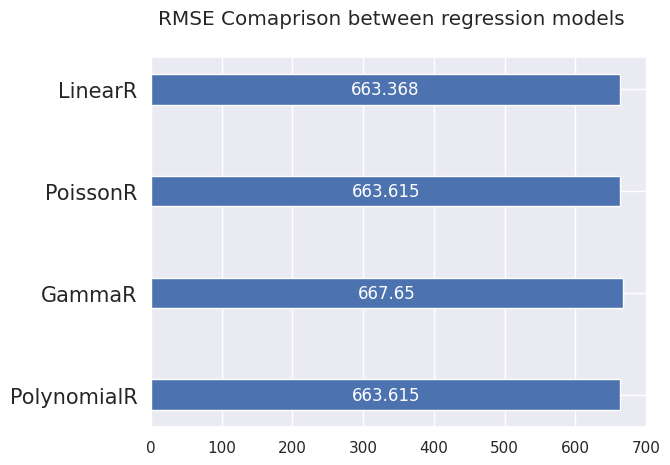

In [45]:
fig = plt.figure()
fig.suptitle('RMSE Comaprison between regression models')
ax = fig.add_subplot(111)

p = plt.barh(names,results, align='center', height=0.3)
ax.bar_label(p, label_type='center',color= 'w')
ax.set_yticklabels(names,fontsize=15)
ax.invert_yaxis()
plt.show()